Name: Muley, Tushar

Title: DSC550 Term Project

Date: May 2, 2021 Milestone 2

# Exercise 7-3 Week 7 Milestone 2

In [37]:
#Columns names
df_credit.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'JOB',
       'BEGIN_MONTHS', 'STATUS', 'TARGET', 'FAMILY_STATUS_Civil marriage',
       'FAMILY_STATUS_Married', 'FAMILY_STATUS_Separated',
       'FAMILY_STATUS_Single / not married', 'FAMILY_STATUS_Widow',
       'EDUCATION_TYPE_Academic degree', 'EDUCATION_TYPE_Higher education',
       'EDUCATION_TYPE_Incomplete higher', 'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'AGE_OF_APP',
       'TIME_EMPLOYED'],
      dtype='object')

In [38]:
#Preview columns in prepartion to drop a features
df_credit

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,EDUCATION_TYPE_Academic degree,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,AGE_OF_APP,TIME_EMPLOYED
0,5065438,F,1,0,2,270000.0,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0,0,1,0,0,0,0,0,0,0,1,36,6.39
1,5142753,F,0,0,0,81000.0,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0,0,0,0,1,0,0,0,0,0,1,49,1.05
2,5111146,M,1,1,0,270000.0,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0,0,1,0,0,0,0,1,0,0,0,54,2.86
3,5010310,F,1,1,1,112500.0,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0,0,1,0,0,0,0,0,0,0,1,41,5.43
4,5010835,M,1,1,2,139500.0,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0,0,1,0,0,0,0,0,0,0,1,48,15.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,M,1,0,1,166500.0,With parents,-12372,-5401,1,0,1,0,Core staff,-8,0,0,0,1,0,0,0,0,0,0,0,1,34,15.00
537663,5010773,F,0,1,0,135000.0,With parents,-14160,-4635,1,0,0,0,Sales staff,-8,0,0,0,1,0,0,0,0,1,0,0,0,39,12.88
537664,5105601,M,0,1,0,180000.0,House / apartment,-24204,-2462,1,0,0,0,Private service staff,-7,0,0,0,1,0,0,0,0,1,0,0,0,67,6.84
537665,5132833,M,1,0,0,220500.0,House / apartment,-22647,-3847,1,0,1,0,Laborers,-1,0,0,0,1,0,0,0,0,0,0,0,1,62,10.69


In this analysis I don't believe having there is a need for indicators related to Mobile number, work phone number, phone number or email. The reason being those features do not relate to get approved for credit or related to how risky or not risky you are as a debtor. It is more so the lender can contact you or your sub-applicatant. More so if you are delinquent the lender can get a hold of you for a payment or reason for your delinquency. I am remove those as those feature do not relate to the analysis.

In [39]:
#Drop columns that are not needed.
df_credit=df_credit.drop(["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"], axis=1)

The next setof feature I am thinking about dropping is DAYS_BIRTH and DAYS_EMPLOYED. Since I took those features and created more readable features called AGE_OF_APP to replace DAYS_BIRTH and TIME_EMPLOYED to replace DAYS_EMPLOYED I don't see a reason keeping those features since they are duplicates and I have transformed them into more readable features.

BEGIN_MONTHS is described as the month the loan started. I going to drop this since my analysis deals with what features are correlated to get a loan. It does not make sense to know how many months this loan has been paid on.

STATUS this field indicates the status of the current loan. I don't need to know the status of the loan. I might want to us it later to determine if risky applicants actually failed to pay and when they went delinquent. For now I am removing it.

CNT_CHILDREN this i field I updated to numerical early on. But after reviewing the graphs and thinking about it makes no sense to have it. Not even sure how it would play into getting approved for credit. Droping it.

Some of the other fields like FAMILY_STATUS I think matters. It is an indicator of the stability of the debtor. I am keeping that along with education (EDUCATION_TYPE) and NAME_HOUSING_TYPE which indicates your living status i.e. with parents, rent or own.

In [40]:
df_credit=df_credit.drop(["DAYS_BIRTH", "DAYS_EMPLOYED", "BEGIN_MONTHS", "STATUS", "CNT_CHILDREN"], axis=1)

In [41]:
#Double check the missing data
#Check of missing data values.
for c in df_credit.columns:
    miss=df_credit[c].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(c,miss))
    else:
        print('{} has NO missing values'.format(c))

ID has NO missing values
CODE_GENDER has NO missing values
FLAG_OWN_CAR has NO missing values
FLAG_OWN_REALTY has NO missing values
AMT_INCOME_TOTAL has NO missing values
NAME_HOUSING_TYPE has NO missing values
JOB has NO missing values
TARGET has NO missing values
FAMILY_STATUS_Civil marriage has NO missing values
FAMILY_STATUS_Married has NO missing values
FAMILY_STATUS_Separated has NO missing values
FAMILY_STATUS_Single / not married has NO missing values
FAMILY_STATUS_Widow has NO missing values
EDUCATION_TYPE_Academic degree has NO missing values
EDUCATION_TYPE_Higher education has NO missing values
EDUCATION_TYPE_Incomplete higher has NO missing values
EDUCATION_TYPE_Lower secondary has NO missing values
EDUCATION_TYPE_Secondary / secondary special has NO missing values
AGE_OF_APP has NO missing values
TIME_EMPLOYED has NO missing values


Note: I don't have an missing values in my dataset. Do not see a need to fill in any values.

In [42]:
#Columns names
df_credit.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'JOB', 'TARGET',
       'FAMILY_STATUS_Civil marriage', 'FAMILY_STATUS_Married',
       'FAMILY_STATUS_Separated', 'FAMILY_STATUS_Single / not married',
       'FAMILY_STATUS_Widow', 'EDUCATION_TYPE_Academic degree',
       'EDUCATION_TYPE_Higher education', 'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'AGE_OF_APP',
       'TIME_EMPLOYED'],
      dtype='object')

In [56]:
#Give me a copy to revert back to if needed.
df_credit_copy_2 = df_credit.copy(deep=True)

In [57]:
#Generate binary values for CODE_GENDER, NAME_HOUSING_TYPE and JOB  column
#Gender
df_credit = pd.get_dummies(df_credit, columns=["CODE_GENDER"], prefix=["SEX"])
#Housing
df_credit = pd.get_dummies(df_credit, columns=["NAME_HOUSING_TYPE"], prefix=["HOUSING_TYPE"])
#Job
df_credit = pd.get_dummies(df_credit, columns=["JOB"], prefix=["JOB_TYPE"])

In [58]:
#Quick print to see what changes
df_credit.head(10)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,TARGET,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,EDUCATION_TYPE_Academic degree,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,AGE_OF_APP,TIME_EMPLOYED,SEX_F,SEX_M,HOUSING_TYPE_Co-op apartment,HOUSING_TYPE_House / apartment,HOUSING_TYPE_Municipal apartment,HOUSING_TYPE_Office apartment,HOUSING_TYPE_Rented apartment,HOUSING_TYPE_With parents,JOB_TYPE_Accountants,JOB_TYPE_Cleaning staff,JOB_TYPE_Cooking staff,JOB_TYPE_Core staff,JOB_TYPE_Drivers,JOB_TYPE_HR staff,JOB_TYPE_High skill tech staff,JOB_TYPE_IT staff,JOB_TYPE_Laborers,JOB_TYPE_Low-skill Laborers,JOB_TYPE_Managers,JOB_TYPE_Medicine staff,JOB_TYPE_Private service staff,JOB_TYPE_Realty agents,JOB_TYPE_Sales staff,JOB_TYPE_Secretaries,JOB_TYPE_Security staff,JOB_TYPE_Waiters/barmen staff
0,5065438,1,0,270000.0,0,0,1,0,0,0,0,0,0,0,1,36,6.39,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5142753,0,0,81000.0,0,0,0,0,1,0,0,0,0,0,1,49,1.05,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5111146,1,1,270000.0,0,0,1,0,0,0,0,1,0,0,0,54,2.86,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,5010310,1,1,112500.0,0,0,1,0,0,0,0,0,0,0,1,41,5.43,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5010835,1,1,139500.0,0,0,1,0,0,0,0,0,0,0,1,48,15.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5067057,1,1,144000.0,0,0,1,0,0,0,0,0,0,0,1,42,8.22,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5095635,1,0,180000.0,0,0,1,0,0,0,0,1,0,0,0,31,0.61,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,5096402,1,0,405000.0,0,0,1,0,0,0,0,1,0,0,0,51,8.89,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,5061372,0,1,135000.0,0,0,0,0,1,0,0,0,0,0,1,47,23.12,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,5026464,0,1,270000.0,0,0,1,0,0,0,0,0,0,0,1,46,7.56,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [59]:
df_credit.columns

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'TARGET',
       'FAMILY_STATUS_Civil marriage', 'FAMILY_STATUS_Married',
       'FAMILY_STATUS_Separated', 'FAMILY_STATUS_Single / not married',
       'FAMILY_STATUS_Widow', 'EDUCATION_TYPE_Academic degree',
       'EDUCATION_TYPE_Higher education', 'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'AGE_OF_APP',
       'TIME_EMPLOYED', 'SEX_F', 'SEX_M', 'HOUSING_TYPE_Co-op apartment',
       'HOUSING_TYPE_House / apartment', 'HOUSING_TYPE_Municipal apartment',
       'HOUSING_TYPE_Office apartment', 'HOUSING_TYPE_Rented apartment',
       'HOUSING_TYPE_With parents', 'JOB_TYPE_Accountants',
       'JOB_TYPE_Cleaning staff', 'JOB_TYPE_Cooking staff',
       'JOB_TYPE_Core staff', 'JOB_TYPE_Drivers', 'JOB_TYPE_HR staff',
       'JOB_TYPE_High skill tech staff', 'JOB_TYPE_IT staff',
       'JOB_TYPE_Laborers', 'JOB_TYPE_Low-skill Laborers'

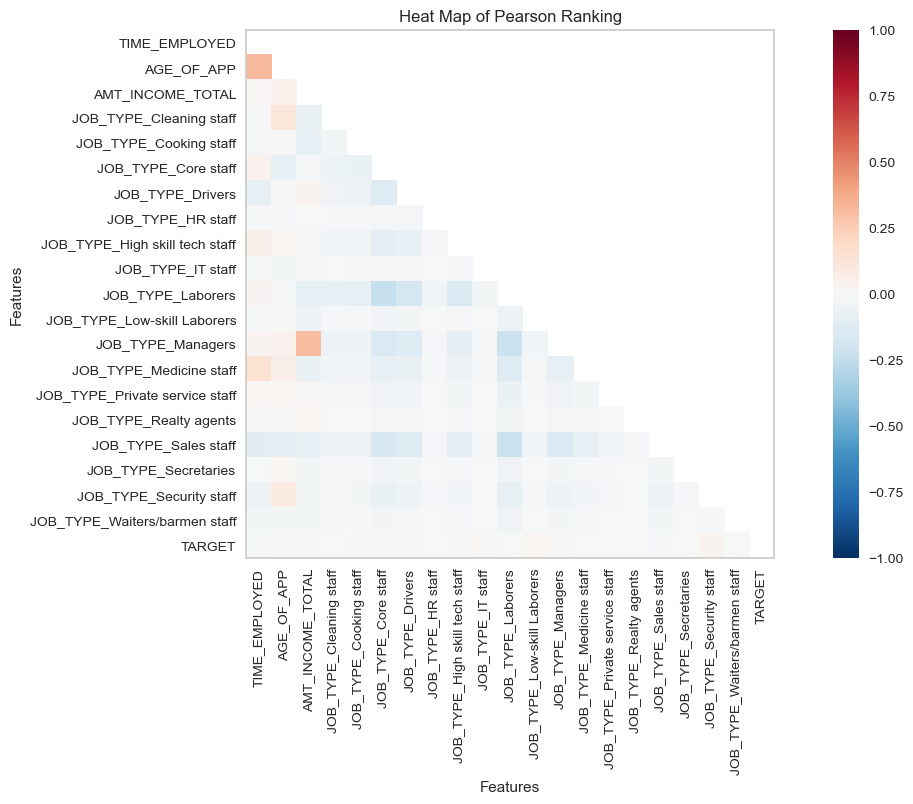

In [60]:
#Run another heat map a different way
#New features
num_features = ['TIME_EMPLOYED', 'AGE_OF_APP', 'AMT_INCOME_TOTAL','JOB_TYPE_Cleaning staff', 'JOB_TYPE_Cooking staff',
       'JOB_TYPE_Core staff', 'JOB_TYPE_Drivers', 'JOB_TYPE_HR staff',
       'JOB_TYPE_High skill tech staff', 'JOB_TYPE_IT staff',
       'JOB_TYPE_Laborers', 'JOB_TYPE_Low-skill Laborers', 'JOB_TYPE_Managers',
       'JOB_TYPE_Medicine staff', 'JOB_TYPE_Private service staff',
       'JOB_TYPE_Realty agents', 'JOB_TYPE_Sales staff',
       'JOB_TYPE_Secretaries', 'JOB_TYPE_Security staff',
       'JOB_TYPE_Waiters/barmen staff',
                'TARGET']
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df_credit[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.title("Heat Map of Pearson Ranking")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

Note: After some thought I have decided that JOB feature should be dropped or at least filtered out. I believe it would be nice to have in the analysis, but it will not help me in the model. I can always go back and added it in. But right now there are too many variables and based on a correlation it appears job type has no impact on risk of an applicant not paying. I had decided to keep ID field so I can use it later if I have merge the two data sets later.

In [62]:
#Reverting back a copy to remove JOB Feature
df_credit = df_credit_copy_2.copy(deep=True)

In [63]:
#Checking to see my copy revert worked
df_credit.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'JOB', 'TARGET',
       'FAMILY_STATUS_Civil marriage', 'FAMILY_STATUS_Married',
       'FAMILY_STATUS_Separated', 'FAMILY_STATUS_Single / not married',
       'FAMILY_STATUS_Widow', 'EDUCATION_TYPE_Academic degree',
       'EDUCATION_TYPE_Higher education', 'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'AGE_OF_APP',
       'TIME_EMPLOYED'],
      dtype='object')

In [64]:
#Remove the JOB feature
df_credit=df_credit.drop(["JOB"], axis=1)

In [65]:
#Check columns
df_credit.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'NAME_HOUSING_TYPE', 'TARGET',
       'FAMILY_STATUS_Civil marriage', 'FAMILY_STATUS_Married',
       'FAMILY_STATUS_Separated', 'FAMILY_STATUS_Single / not married',
       'FAMILY_STATUS_Widow', 'EDUCATION_TYPE_Academic degree',
       'EDUCATION_TYPE_Higher education', 'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'AGE_OF_APP',
       'TIME_EMPLOYED'],
      dtype='object')

Note: Replace some data values to simply the analysis and reduce the number of features.
Co-op apartment = Own
House / apartment = Own
Municipal apartment = Rent
Office apartment = Rent
Rented apartment = Rent
With parents = Free

In [73]:
#Replace some data values to simply the analysis.

df_credit["NAME_HOUSING_TYPE"]=df_credit["NAME_HOUSING_TYPE"].replace(to_replace=["Co-op apartment",
                                                                                     "House / apartment"],
                                                                        value="Own")

df_credit["NAME_HOUSING_TYPE"]=df_credit["NAME_HOUSING_TYPE"].replace(to_replace =["Municipal apartment", "Office apartment","Rented apartment"], value ="Rent")

df_credit["NAME_HOUSING_TYPE"] = df_credit["NAME_HOUSING_TYPE"].replace(to_replace ="With parents", value ="Free")

#Check columns
df_credit.head(8)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,TARGET,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,EDUCATION_TYPE_Academic degree,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,AGE_OF_APP,TIME_EMPLOYED
0,5065438,F,1,0,270000.0,Free,0,0,1,0,0,0,0,0,0,0,1,36,6.39
1,5142753,F,0,0,81000.0,Own,0,0,0,0,1,0,0,0,0,0,1,49,1.05
2,5111146,M,1,1,270000.0,Own,0,0,1,0,0,0,0,1,0,0,0,54,2.86
3,5010310,F,1,1,112500.0,Own,0,0,1,0,0,0,0,0,0,0,1,41,5.43
4,5010835,M,1,1,139500.0,Own,0,0,1,0,0,0,0,0,0,0,1,48,15.49
5,5067057,F,1,1,144000.0,Own,0,0,1,0,0,0,0,0,0,0,1,42,8.22
6,5095635,M,1,0,180000.0,Own,0,0,1,0,0,0,0,1,0,0,0,31,0.61
7,5096402,M,1,0,405000.0,Own,0,0,1,0,0,0,0,1,0,0,0,51,8.89


In [74]:
#Redo the One Hot encoding for Gender and housing type
#Gender
df_credit = pd.get_dummies(df_credit, columns=["CODE_GENDER"], prefix=["SEX"])
#Housing
df_credit = pd.get_dummies(df_credit, columns=["NAME_HOUSING_TYPE"], prefix=["HOUSING_TYPE"])

#Print columns headers
df_credit.columns

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'TARGET',
       'FAMILY_STATUS_Civil marriage', 'FAMILY_STATUS_Married',
       'FAMILY_STATUS_Separated', 'FAMILY_STATUS_Single / not married',
       'FAMILY_STATUS_Widow', 'EDUCATION_TYPE_Academic degree',
       'EDUCATION_TYPE_Higher education', 'EDUCATION_TYPE_Incomplete higher',
       'EDUCATION_TYPE_Lower secondary',
       'EDUCATION_TYPE_Secondary / secondary special', 'AGE_OF_APP',
       'TIME_EMPLOYED', 'SEX_F', 'SEX_M', 'HOUSING_TYPE_Free',
       'HOUSING_TYPE_Own', 'HOUSING_TYPE_Rent'],
      dtype='object')

In [75]:
#Check data
df_credit.head(8)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,TARGET,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Widow,EDUCATION_TYPE_Academic degree,EDUCATION_TYPE_Higher education,EDUCATION_TYPE_Incomplete higher,EDUCATION_TYPE_Lower secondary,EDUCATION_TYPE_Secondary / secondary special,AGE_OF_APP,TIME_EMPLOYED,SEX_F,SEX_M,HOUSING_TYPE_Free,HOUSING_TYPE_Own,HOUSING_TYPE_Rent
0,5065438,1,0,270000.0,0,0,1,0,0,0,0,0,0,0,1,36,6.39,1,0,1,0,0
1,5142753,0,0,81000.0,0,0,0,0,1,0,0,0,0,0,1,49,1.05,1,0,0,1,0
2,5111146,1,1,270000.0,0,0,1,0,0,0,0,1,0,0,0,54,2.86,0,1,0,1,0
3,5010310,1,1,112500.0,0,0,1,0,0,0,0,0,0,0,1,41,5.43,1,0,0,1,0
4,5010835,1,1,139500.0,0,0,1,0,0,0,0,0,0,0,1,48,15.49,0,1,0,1,0
5,5067057,1,1,144000.0,0,0,1,0,0,0,0,0,0,0,1,42,8.22,1,0,0,1,0
6,5095635,1,0,180000.0,0,0,1,0,0,0,0,1,0,0,0,31,0.61,0,1,0,1,0
7,5096402,1,0,405000.0,0,0,1,0,0,0,0,1,0,0,0,51,8.89,0,1,0,1,0


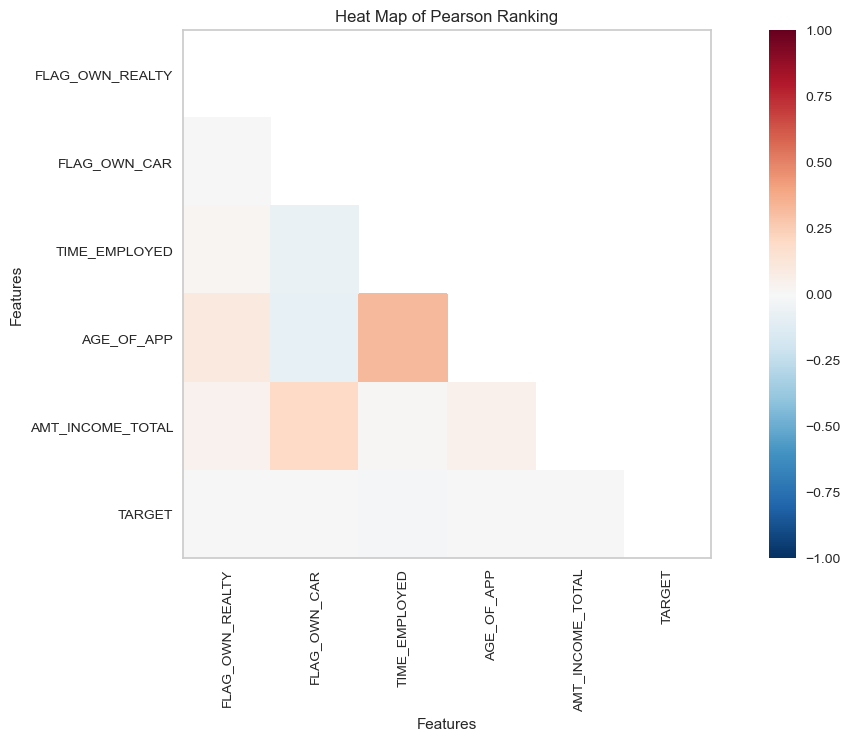

In [43]:
#Run another heat map a different way
#New features
num_features = ["FLAG_OWN_REALTY", "FLAG_OWN_CAR", "TIME_EMPLOYED", "AGE_OF_APP", "AMT_INCOME_TOTAL",
                "TARGET"]
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df_credit[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.title("Heat Map of Pearson Ranking")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [77]:
# check the data
print(df_credit.describe())

                 ID   FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
count  5.376670e+05  537667.000000    537667.000000      5.376670e+05   
mean   5.079231e+06       0.430490         0.642537      1.971171e+05   
std    4.200200e+04       0.495145         0.479253      1.041390e+05   
min    5.008806e+06       0.000000         0.000000      2.700000e+04   
25%    5.044925e+06       0.000000         0.000000      1.350000e+05   
50%    5.079091e+06       0.000000         1.000000      1.800000e+05   
75%    5.115755e+06       1.000000         1.000000      2.295000e+05   
max    5.150487e+06       1.000000         1.000000      1.575000e+06   

              TARGET  FAMILY_STATUS_Civil marriage  FAMILY_STATUS_Married  \
count  537667.000000                 537667.000000          537667.000000   
mean        0.003649                      0.081989               0.714202   
std         0.060298                      0.274349               0.451794   
min         0.000000              

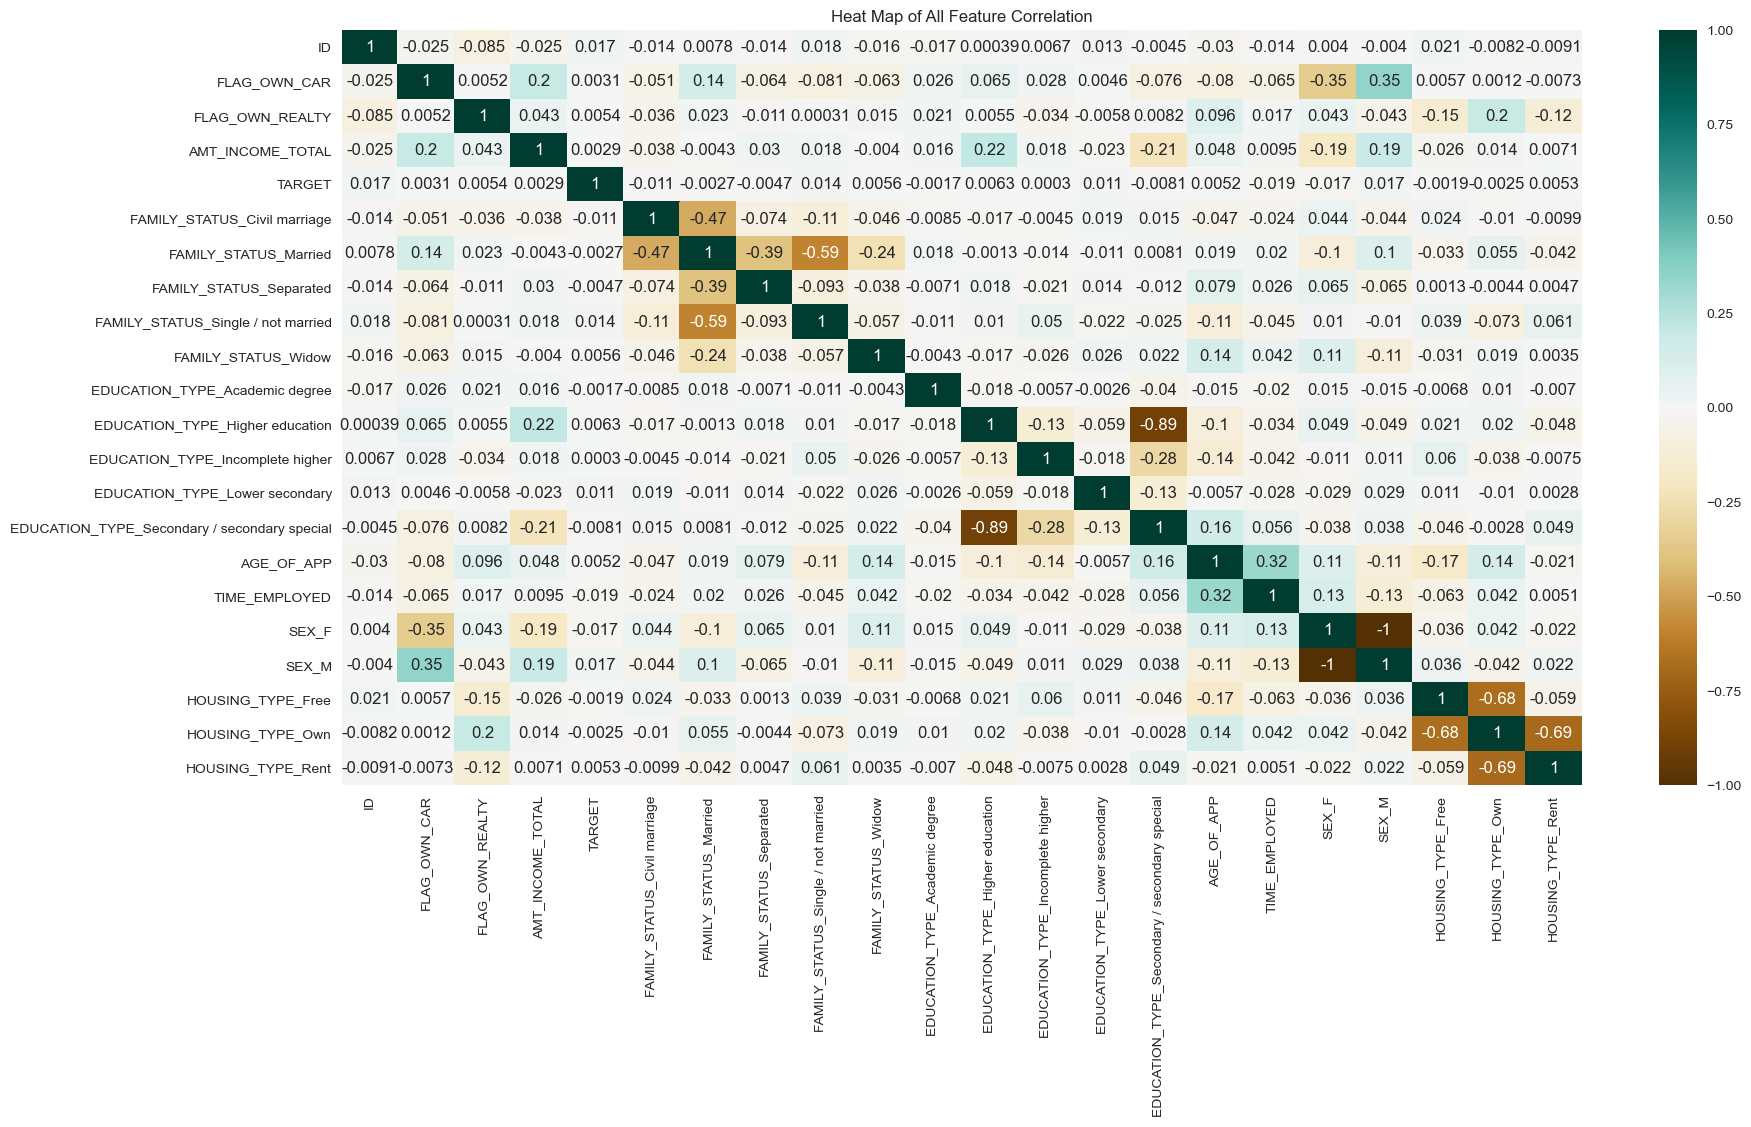

In [76]:
#Run another heat map a different way
plt.figure(figsize=(20,10))
c= df_credit.corr()
plt.title("Heat Map of All Feature Correlation")
plt.xlabel("Features")
plt.ylabel("Features")
sns.heatmap(c,cmap="BrBG",annot=True)